In [2]:

using Latexify
using AbstractAlgebra
using GLMakie

In [3]:
include("mdulos/liner_utils.jl")
using .linearUtils

In [4]:
Makie.inline!(true)

true

# EIGENSTUFF: 
REVEALING HIDDEN STRUCTURE

In [5]:
RR = RealField;
Rs, (F, R, n, p, a, b, v, λ, A, I) = polynomial_ring(RR, [:F, :R, :n, :p, :a, :b, :v, :λ, :A, :I])

(Multivariate polynomial ring in 10 variables over floats, AbstractAlgebra.Generic.MPoly{BigFloat}[F, R, n, p, a, b, v, λ, A, I])

In [6]:
Rs, w = polynomial_ring(Rs, :w => (1:3))

(Multivariate polynomial ring in 3 variables over multivariate polynomial ring, AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}[w[1], w[2], w[3]])

In [7]:
Rs[0.6 0.5; -p 1.2] * Rs[1; 0.5]

[         0.84999999999999997779553950749686919152736663818359375]
[-1.0*p + 0.59999999999999997779553950749686919152736663818359375]

## Population Dynamics Application

The fox and rabits linear equations.

In [8]:
Fn_1(n) = 0.6 * F + n + 0.5 * R + n
Rn_1(p, n) = -p * F + n + 1.2 * R + n

Rn_1 (generic function with 1 method)

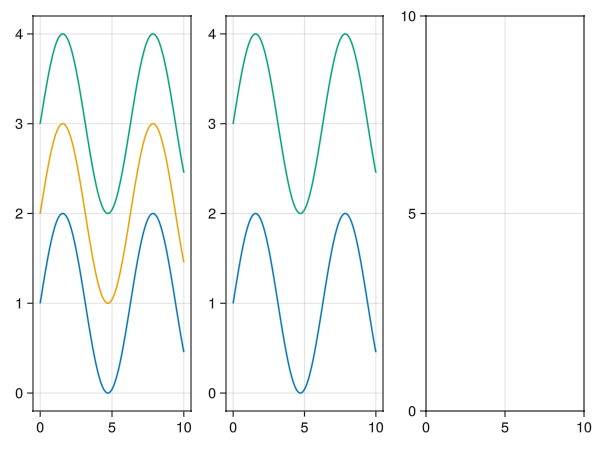

In [9]:
f = Figure()

axs = [Axis(f[1, i]) for i in 1:3]

scatters = map(axs) do ax
    [lines!(ax, 0:0.1:10, x -> sin(x) + i) for i in 1:3]
end

delete!(axs[2], scatters[2][2])
empty!(axs[3])

f

In [10]:
Fn_1(1)

0.59999999999999997779553950749686919152736663818359375*F + 0.5*R + 2.0

In [11]:
Rn_1(1, 1)

-1.0*F + 1.1999999999999999555910790149937383830547332763671875*R + 2.0

In [12]:
MA = Rs[0.6 0.5; -p 1.2] .* Rs[1 0.5;]
Ma = [0.6 0.5; -p 1.2] .* [1 0.5;]

2×2 Matrix{Any}:
 0.6      0.25
  -1.0*p  0.6

In [13]:
[Fn_1; Rn_1] ~ Rs[0.6 0.5; -p 1.2] * Rs[F; R]

Function[Main.Fn_1, Main.Rn_1] ~ [0.59999999999999997779553950749686919152736663818359375*F+0.5*R; -1.0*F*p+1.1999999999999999555910790149937383830547332763671875*R]

In [14]:
x_0 = Rs[F; R]

[F]
[R]

In [15]:
x_1(x) = MA * x_0

x_1 (generic function with 1 method)

In [16]:
x_2(x) = MA^2 * x

x_2 (generic function with 1 method)

In [17]:
x_n(x, n) = MA * x_1(x) ~ MA * MA * x_0 ~ MA^n * x_0

x_n (generic function with 1 method)

In [18]:
x_1(1)

[  0.59999999999999997779553950749686919152736663818359375*F + 0.25*R]
[-1.0*F*p + 0.59999999999999997779553950749686919152736663818359375*R]

In [19]:
x_2(1)

[-0.25*p + 0.3599999999999999733546474089962435228709057289526908823303533017413935457540219                                      0.299999999999999988897769753748434595763683319091796875]
[                                  -1.1999999999999999555910790149937383830547332763671875*p   -0.25*p + 0.3599999999999999733546474089962435228709057289526908823303533017413935457540219]

In [20]:
x_n(1, 2)

[-0.25*F*p+0.3599999999999999733546474089962435228709057289526908823303533017413935457540219*F+0.299999999999999988897769753748434595763683319091796875*R; -1.1999999999999999555910790149937383830547332763671875*F*p-0.25*R*p+0.3599999999999999733546474089962435228709057289526908823303533017413935457540219*R] ~ [-0.25*F*p+0.3599999999999999733546474089962435228709057289526908823303533017413935457540219*F+0.299999999999999988897769753748434595763683319091796875*R; -1.1999999999999999555910790149937383830547332763671875*F*p-0.25*R*p+0.3599999999999999733546474089962435228709057289526908823303533017413935457540219*R] ~ [-0.25*F*p+0.3599999999999999733546474089962435228709057289526908823303533017413935457540219*F+0.299999999999999988897769753748434595763683319091796875*R; -1.1999999999999999555910790149937383830547332763671875*F*p-0.25*R*p+0.3599999999999999733546474089962435228709057289526908823303533017413935457540219*R]

In [21]:
v_n = [b*w[1] + b*w[2]]

1-element Vector{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}:
 b*w[1] + b*w[2]

In [22]:
Av = A*(a*w[1] + b*w[2]) ~ a*2w[1] + b*7w[2]

a*A*w[1] + b*A*w[2] ~ 2.0*a*w[1] + 7.0*b*w[2]

In [23]:
An_v(n) = a*2^n*w[1] + b*7^n*w[2]

An_v (generic function with 1 method)

In [24]:
An_v(1)

2.0*a*w[1] + 7.0*b*w[2]

## Eigenvectors and Eigenvalues

In [25]:
[λ*I] .*v

1-element Vector{AbstractAlgebra.Generic.MPoly{BigFloat}}:
 v*λ*I

In [26]:
 [A] .* v ~ [λ*I] .*v

AbstractAlgebra.Generic.MPoly{BigFloat}[v*A] ~ AbstractAlgebra.Generic.MPoly{BigFloat}[v*λ*I]

In [27]:
[A] .*v - [λ*I] .*v ~ [0]

AbstractAlgebra.Generic.MPoly{BigFloat}[-1.0*v*λ*I + v*A] ~ [0]

In [28]:
[A - λ*I] .*v ~ [0]

AbstractAlgebra.Generic.MPoly{BigFloat}[-1.0*v*λ*I + v*A] ~ [0]

***The eingen equations using lamda as the eingen value as scaler multiplication.***

In [29]:
[-1.0 * v * λ.* I + v.* A] ~ [0]

AbstractAlgebra.Generic.MPoly{BigFloat}[-1.0*v*λ*I + v*A] ~ [0]

In [61]:
eingen_eq(v = v, λ = λ, I = I, A = A) = [-1.0 * v * λ.* I + v.* A] ~ [0];
eingen_eq()

AbstractAlgebra.Generic.MPoly{BigFloat}[-1.0*v*λ*I + v*A] ~ [0]

In [62]:
eingen_eq(Rs[4; 2], 2, identity(Rs[1 2; 3 4]), Rs[1 2; 3 4])

AbstractAlgebra.Generic.MatSpaceElem{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}[[-4.0 -8.0; -6.0 -8.0]] ~ [0]

This equation will have a result because the null-space of [A - \lambda * I] is at least 1 and cannot be zero.

In [32]:
nullity(A, λ, I) = [A - λ*I]

nullity (generic function with 1 method)

So symbolic this is one is then visible here.

In [33]:
[A - λ*I] .*v ~ 0

AbstractAlgebra.Generic.MPoly{BigFloat}[-1.0*v*λ*I + v*A] ~ 0

In [34]:
nullity(MA, 1, identity(MA))

1-element Vector{AbstractAlgebra.Generic.MatSpaceElem{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}:
 [0 0; 0 0]

the determinat eingen equation.

In [35]:
det([-1.0*v*λ*I + v*A])

MethodError: MethodError: no method matching det(::Vector{AbstractAlgebra.Generic.MPoly{BigFloat}})
The function `det` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  det(!Matched::SparseArrays.UMFPACK.UmfpackLU{Float64, Int32})
   @ SparseArrays ~/.julia/juliaup/julia-1.11.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/SparseArrays/src/solvers/umfpack.jl:708
  det(!Matched::SparseArrays.UMFPACK.UmfpackLU{ComplexF64, Int32})
   @ SparseArrays ~/.julia/juliaup/julia-1.11.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/SparseArrays/src/solvers/umfpack.jl:714
  det(!Matched::SparseArrays.UMFPACK.UmfpackLU{Float64, Int64})
   @ SparseArrays ~/.julia/juliaup/julia-1.11.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/SparseArrays/src/solvers/umfpack.jl:708
  ...
